In [208]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, r2_score
from sklearn.metrics import classification_report
%matplotlib inline

In [209]:
# grab data, already cleaned from kaggle
df = pd.read_csv("data/prices-split-adjusted.csv")
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [210]:
# check for null and duplicate
print("null:", df.isnull().sum().sum())
print("dupe:", df.duplicated().sum())

# look at the size of data
print("Shape:", df.shape)

null: 0
dupe: 0
Shape: (851264, 7)


In [211]:
# check out the stocks available
df['symbol'].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [212]:
selected_stocks = ["AAPL", "AMZN", "NFLX", "GOOGL"]

In [213]:
# filter by selected stocks
df = df[df['symbol'].isin(selected_stocks)]
df['symbol'].value_counts()

AAPL     1762
AMZN     1762
GOOGL    1762
NFLX     1762
Name: symbol, dtype: int64

In [214]:
# sort df
df.sort_values(by='date', inplace=True)

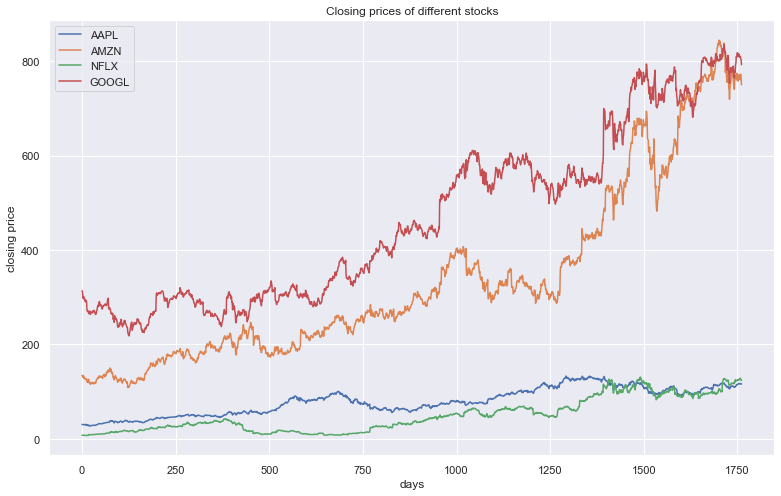

In [215]:
fig, ax = plt.subplots(1, sharex=True, figsize=(13, 8))
for i in range(len(selected_stocks)):
    stock = selected_stocks[i]
    cond = df['symbol'] == stock
    ax.plot(df[cond]['close'].values, label=stock)

plt.title('Closing prices of different stocks')
plt.xlabel("days")
plt.ylabel("closing price")
plt.legend(loc='best')

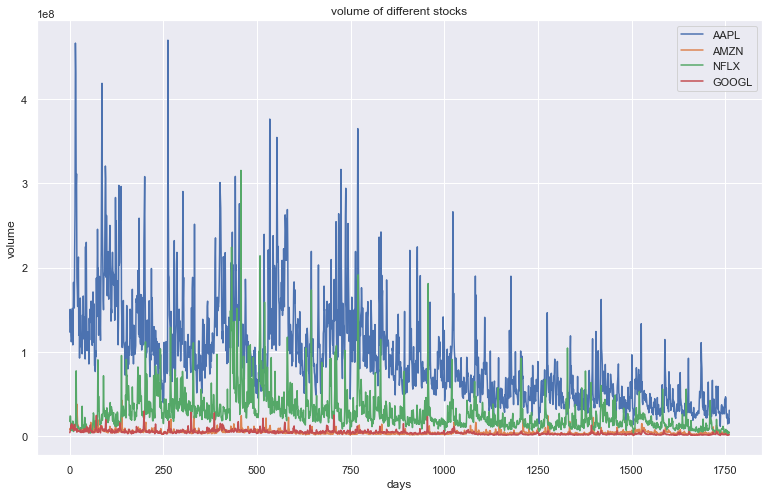

In [216]:
fig, ax = plt.subplots(1, sharex=True, figsize=(13, 8))
for i in range(len(selected_stocks)):
    stock = selected_stocks[i]
    cond = df['symbol'] == stock
    ax.plot(df[cond]['volume'].values, label=stock)

plt.title('volume of different stocks')
plt.xlabel("days")
plt.ylabel("volume")
plt.legend(loc='best')

In [217]:
def get_train_test(df, symbol, features, target, test_size = 0.1):
    rows = df[df.symbol==symbol].shape[0]
    test_start = int(rows * (1-test_size))
    
    x_train = df[df.symbol==symbol][features][:test_start]
    x_test = df[df.symbol==symbol][features][test_start:]
    
    y_train = df[df.symbol==symbol][target][:test_start]
    y_test = df[df.symbol==symbol][target][test_start:]
    
#     test_time_period = df[df.symbol==symbol]['date'][test_start:]
    
    return x_train, x_test, y_train, y_test


In [231]:
def predict(model, symbols, features, target="close", test_size=0.1):
    for symbol in symbols:
        # get test and training data
        X_train, X_test, y_train, y_test = get_train_test(df, symbol, features, target, test_size)

        print("X train/test shape:", X_train.shape, X_test.shape)
        print("y train/test shape:", y_train.shape, y_test.shape)
        
        #fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # get accuracy for each model
        print("Symbol:", symbol, ", Model:", model)
        print("Accuracy:", r2_score(y_test,y_pred))
        
        # plot predictions against actual
        pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        plt.figure(figsize=(8, 8))
        plt.ylabel('Close Price', fontsize=12)
        plt.plot(pred_df)
        plt.legend(['Actual Value', 'Predictions'])
        plt.xticks([]) 
        plt.title(symbol + ' prediction VS actual (test data, linear regression)')
        plt.show()

In [232]:
features = ['open', 'low','high','volume']
symbols = ['AAPL', 'AMZN', 'NFLX', 'GOOGL']
target = "close"

X train/test shape: (1409, 4) (353, 4)
y train/test shape: (1409,) (353,)
Symbol: AAPL , Model: LinearRegression()
Accuracy: 0.9942886994670898


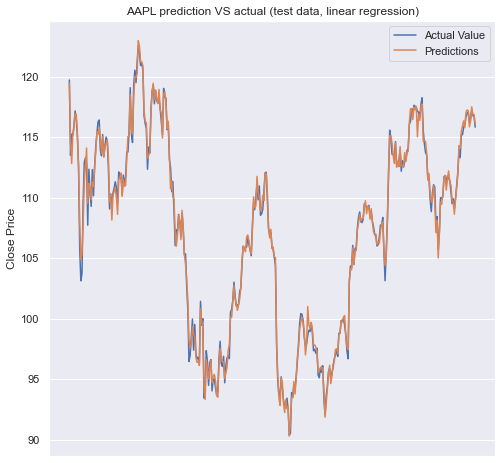

X train/test shape: (1409, 4) (353, 4)
y train/test shape: (1409,) (353,)
Symbol: AMZN , Model: LinearRegression()
Accuracy: 0.9985499111147175


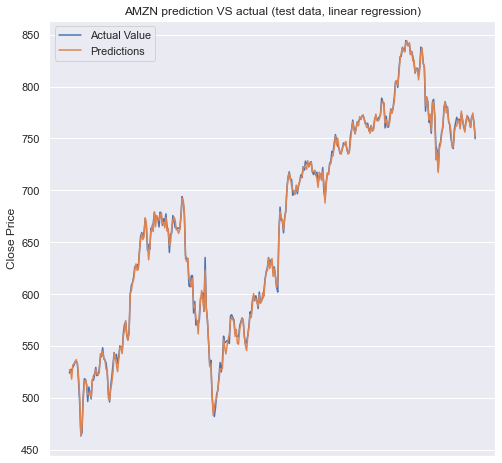

X train/test shape: (1409, 4) (353, 4)
y train/test shape: (1409,) (353,)
Symbol: NFLX , Model: LinearRegression()
Accuracy: 0.9902081444967813


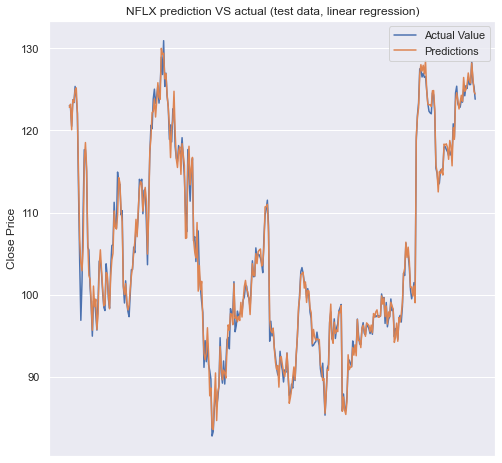

X train/test shape: (1409, 4) (353, 4)
y train/test shape: (1409,) (353,)
Symbol: GOOGL , Model: LinearRegression()
Accuracy: 0.9939910808833737


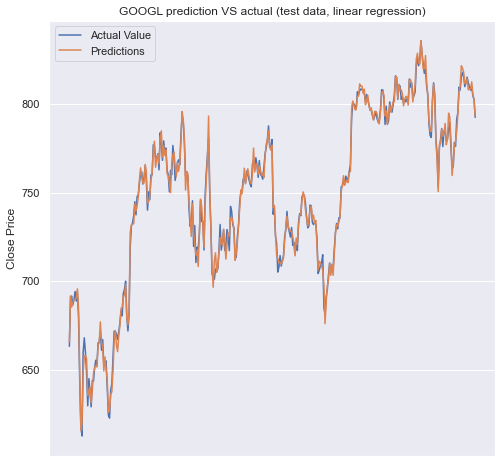

In [233]:
predict(LinearRegression(), symbols, features, target, test_size=0.2)